# Capstone Project - Car Accident Severity (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## TABLE OF CONTENTS
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Exploratory Data Analysis](#exploratory_data_analysis)
* [Predictive Modeling](#predictive_modeling)
* [Results and Discussion](#results_and_discussion)
* [Conclusion](#conclusion)

## INTRODUCTION: BUSINESS PROBLEM <a name="introduction"></a>

Traffic accidents are **one of the major causes of disability and mortality in many different countries**. According to the World Health Organization (WHO) “approximately 1.35 million people die each year as a result of road traffic crashes”, and “road traffic injuries are the leading cause of death for children and young adults.”

It does not only causes deaths, but also millions of non-fatal injuries (between 20 and 50 million more people suffer it, according to the WHO), with many incurring a disability as a result of their injury.

It is also important to note that “more than half of all road traffic deaths are among vulnerable road users”, so it is not only about ourselves as drivers, but also about the passengers, pedestrians, cyclists and motorcyclists that could be involved in an accident.

Those injuries cause economic losses to individuals, their families, and to nations. These losses are materialized as the cost of treatment and lost of productivity for those killed or disabled, and for family members who have to take time off work to care for them. According to WHO, “road traffic crashes cost most countries 3% of their GDP”.

**Speeding and an unsafe road infrastructure are two key risk factors of a road traffic accident**, influencing both the risk of a crash and the severity of the injuries suffered.

On the other hand, the US Department of Transportation explains that **approximately 21% of vehicle crashes in a year are weather-related**.

Let’s set an example of a group of friends or a family that is planning to travel by car to visit their relatives / friends. Wouldn’t it be great if there was something in place that could warn them, given the weather and the road conditions about the possibility of getting into a car accident and how severe it would be, so that they would drive more carefully or even change their travel if they are able to? Or imagine that you have a very important business meeting in another city and you are a bit in a hurry, it would be great if there were something to help you to know the places where you have to be more careful when driving, and changing your route if possible, so you arrive both safe and on time.

In this Car Accident Severity Capestone Project we will focus on the analysis of a shared dataset for Seattle city, in order to create a machine-learning model able to **predict accident "severity"**. So drivers can be warned and have more information about the possibility of getting into a car accident and how severe it would be.

## DATA <a name="data"></a>

In this Project we will be using a shared dataset for **Seattle** city. It contains different characteristics about the collisions in this city **between the years 2004 and 2020**. The label for the dataset is **severity**, which describes the fatality of an accident. The severity can be an “injury collision” or a “property damage only collision”.

Some of the attributes or features from this dataset are: the exact moment and location where accidents take place and the junction type (intersection, driveway junction…); weather (raining, snowing, fog…), road (wet, dry, sand…) and light (daylight, dark with street lights on / of…) condition at that moment; whether the car involved in an accident was speeding or not; if drivers were under the influence of drugs; as well as the number of people and vehicles involved.

We are going to use the dataset described above in order to create a machine-learning model able to predict accident "severity", and see which of the variables mentioned above have a higher/lower effect in the severity of a traffic accident. For example, we will see which weather conditions are more likely to “cause” a traffic accident, if it is during daylight or in dark conditions, in which junction type and how many cars could be involved, among others. This will provide the driver more information about in which conditions he/she should drive more carefully, take another route, or even drive any other day (or time of the day) in better conditions.

#### About the Dataset:

The dataset can be found at: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv.

This dataset is about collisions. The __Data-Collisions.csv__ data set includes details of collisions in Seattle between the years 2004 and 2020. It includes following fields:

| Field          | Description                                                                                          |
|----------------|------------------------------------------------------------------------------------------------------|
| SEVERITYCODE   | A code that corresponds to the severity of the collision (1 is Prop. Damage; 2 is Injury)            |
| X              | -                                                                                                    |
| Y              | -                                                                                                    |
| OBJECTID       | ESRI unique identifier                                                                               |
| INCKEY         | A unique key for the incident                                                                        |
| COLDETKEY      | Secondary key for the incident                                                                       |
| REPORTNO       | Collision report number                                                                              |
| STATUS         | Collision status (Matched or Unmatched)                                                              |
| ADDRTYPE       | Collision address type (intersection, block, alley)                                                  |
| INTKEY         | Key that corresponds to the intersection associated with a collision                                 |
| LOCATION       | Description of the general location of the collision                                                 |
| EXCEPTRSNCODE  | -                                                                                                    |
| EXCEPTRSNDESC  | -                                                                                                    |
| SEVERITYCODE   | A code that corresponds to the severity of the collision (1 is Prop. Damage; 2 is Injury)            |
| SEVERITYDESC   | A detailed description of the severity of the collision                                              |
| COLLISIONTYPE  | Collision type (i.e. Sideswipe, parked car, left turn...)                                            |
| PERSONCOUNT    | The total number of people involved in the collision                                                 |
| PEDCOUNT       | The number of pedestrians involved in the collision                                                  |
| PEDCYLCOUNT    | The number of bicycles involved in the collision                                                     |
| VEHCOUNT       | The number of vehicles involved in the collision                                                     |
| INCDATE        | The date of the incident                                                                             |
| INCDTTM        | The date and time of the incident                                                                    |
| JUNCTIONTYPE   | Category of junction at which collision took place                                                   |
| SDOT_COLCODE   | A code given to the collision by SDOT                                                                |
| SDOT_COLDESC   | A description of the collision corresponding to the collision code                                   |
| INATTENTIONIND | Whether or not collision was due to inattention (Y/N)                                                |
| UNDERINFL      | Whether or not a driver involved was under the influence of drugs or alcohol                         |
| WEATHER        | A description of the weather conditions during the time of the collision                             |
| ROADCOND       | The condition of the road during the collision                                                       |
| LIGHTCOND      | The light conditions during the collision                                                            |
| PEDROWNOTGRNT  | Whether or not the pedestrian right of way was not granted (Y/N)                                     |
| SDOTCOLNUM     | A number given to the collision by SDOT                                                              |
| SPEEDING       | Whether or not speeding was a factor in the collision (Y/N)                                          |
| ST_COLCODE     | A code provided by the state that describes the collision                                            |
| ST_COLDESC     | A description that corresponds to the state’s coding designation                                     |
| SEGLANEKEY     | A key for the lane segment in which the collision occurred                                           |
| CROSSWALKKEY   | A key for the crosswalk at which the collision occurred                                              |
| HITPARKEDCAR   | Whether or not the collision involved hitting a parked car (Y/N)                                     |

#### Import Libraries:

Lets first load some of the required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
%matplotlib inline

#### Download the dataset:

Now lets download the dataset:

In [2]:
!wget -O Data-Collisions.csv https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv

--2020-08-31 20:29:44--  https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv
Resolving s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)... 67.228.254.196
Connecting to s3.us.cloud-object-storage.appdomain.cloud (s3.us.cloud-object-storage.appdomain.cloud)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73917638 (70M) [text/csv]
Saving to: ‘Data-Collisions.csv’

100%[======================================>] 73,917,638  39.1MB/s   in 1.8s   

2020-08-31 20:29:47 (39.1 MB/s) - ‘Data-Collisions.csv’ saved [73917638/73917638]



#### Load Data From CSV File:

In [3]:
df = pd.read_csv('Data-Collisions.csv')
df.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 38)

Lets see the first five rows of the dataset:

In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


#### Data visualization and pre-processing:

The main variable we are going to work with and try to predict is 'SEVERITYCODE'. We are going to select the relevant variables for our analysis and clean the data as follows:

   - Change "Unknown" and "Other" values in 'WEATHER', 'ROADCOND' and 'LIGHTCOND' to "NaN"
   - Replace "NaN" in 'SPEEDING' and 'INATTENTIONIND' by "N"
   - Replace "NaN" in 'UNDERINFL' by "0"
   - Replace "N" by "0" and "Y" by "1" in 'UNDERINFL' and 'SPEEDING'
   - Drop the "NaN" rows

In [5]:
# Select the relevant variables for the analysis
df = df[['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']]

# Change "Unknown" and "Other" values in 'WEATHER', 'ROADCOND' and 'LIGHTCOND' to "NaN"
df['WEATHER'].replace(to_replace=['Unknown','Other'], value=[np.nan,np.nan],inplace=True)
df['ROADCOND'].replace("Unknown", np.nan, inplace = True)
df['ROADCOND'].replace("Other", np.nan, inplace = True)
df['LIGHTCOND'].replace("Unknown", np.nan, inplace = True)
df['LIGHTCOND'].replace("Other", np.nan, inplace = True)

# Replace "NaN" in 'SPEEDING' and 'INATTENTIONIND' by "N"
df['SPEEDING'].replace(np.nan, 'N', inplace=True)
df['INATTENTIONIND'].replace(np.nan, 'N', inplace=True)

# Replace "NaN" in 'UNDERINFL' by "0"
df['UNDERINFL'].replace(np.nan, '0', inplace=True)

# Replace:
df['UNDERINFL'].astype('str')
df['SPEEDING'].astype('str')
df['UNDERINFL'].replace('N','0', inplace=True)
df['UNDERINFL'].replace('Y','1', inplace=True)
df['SPEEDING'].replace('N','0', inplace=True)
df['SPEEDING'].replace('Y','1', inplace=True)
df['UNDERINFL'] = df['UNDERINFL'].astype('int64')
df['SPEEDING'] = df['SPEEDING'].astype('int64')

# Drop the "NaN" rows
df.dropna(inplace = True)

# New shape:
df.shape

(167323, 15)

Here we can see the changes we have made in our dataset:

In [6]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,Angles,2,0,0,2,2013/03/27 00:00:00+00,At Intersection (intersection related),N,0,Overcast,Wet,Daylight,0
1,1,Block,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,Mid-Block (not related to intersection),N,0,Raining,Wet,Dark - Street Lights On,0
2,1,Block,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,Mid-Block (not related to intersection),N,0,Overcast,Dry,Daylight,0
3,1,Block,Other,3,0,0,3,2013/03/29 00:00:00+00,Mid-Block (not related to intersection),N,0,Clear,Dry,Daylight,0
4,2,Intersection,Angles,2,0,0,2,2004/01/28 00:00:00+00,At Intersection (intersection related),N,0,Raining,Wet,Daylight,0


Lets check that we have removed all "NaN" values from our dataset:

In [7]:
df.isnull().sum()

SEVERITYCODE      0
ADDRTYPE          0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDATE           0
JUNCTIONTYPE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64

'SEVERITYCODE' takes value in 1 or 2, being 1 "*Property Damage Only Collision*" and 2 "*Injury Collision*":

In [8]:
df['SEVERITYCODE'].value_counts()

1    112014
2     55309
Name: SEVERITYCODE, dtype: int64

Above we can see that most of the collisions are Property Damage Only. According to our dataset, around 33% are Injury Collisions.

Now lets convert to date time object the 'INCDATE' column, so we can see easily if a collision happens in a weekday or weekends:

In [9]:
df['DAY'] = pd.to_datetime(df['INCDATE']).dt.dayofweek
df['WEEKEND'] = df['DAY'] > 5 
df['WEEKEND'].rename({'False':'Weekday', 'True':'Weekend'}, inplace=True)

## EXPLORATORY DATA ANALYSIS <a name="exploratory_data_analysis"></a>

### Collisions in weekends:

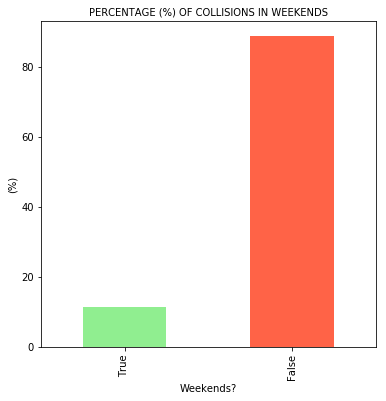

In [10]:
# Generate plot
plt.figure(figsize=(6, 6))
df['WEEKEND'].value_counts(ascending=True, normalize=True).mul(100).plot.bar(color=['lightgreen', 'tomato'])
plt.xlabel("Weekends?")
plt.ylabel("(%)")
plt.title("PERCENTAGE (%) OF COLLISIONS IN WEEKENDS", fontsize=10)

plt.show()

As wee can see in the plot above, it is clear that most of the collisions occur on weekdays instead of weekends.

### Number of Collisions: Severity vs. Collision Type:

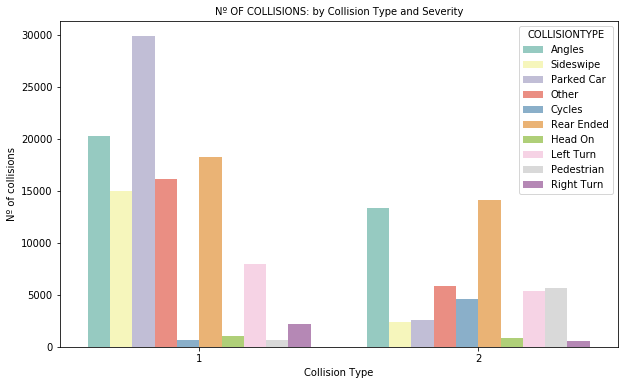

In [11]:
# Generate plot
plt.figure(figsize=(10, 6))
sns.countplot(x="SEVERITYCODE",hue="COLLISIONTYPE", data=df, palette="Set3")
plt.title('Nº OF COLLISIONS: by Collision Type and Severity', fontsize=10)
plt.xlabel("Collision Type")
plt.ylabel("Nº of collisions")

plt.show()

As mentioned before, SEVERITYCODE takes value in 1 or 2, being **1: Property Damage Only Collision** and **2: Injury Collision**. Looking at this plot, we can see the following:

   - Property Damage collision mostly occurs with parked cars being hit, followed by far by angles, and rear-ended impacts.
   - In Injury collision, most of the accidents are rear-end and angle impacts.

### Weather, Road and Light Conditions:

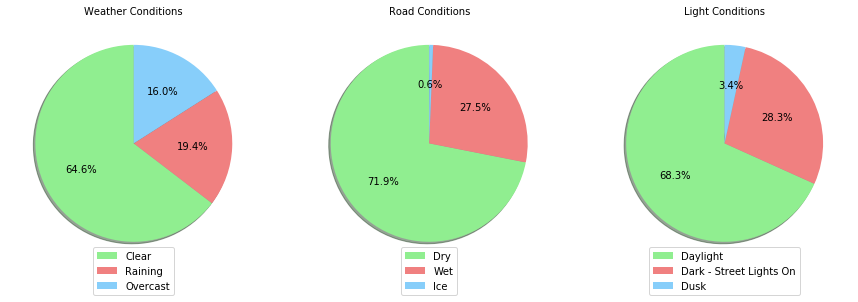

In [12]:
# First we select the top 3 conditions in which most of the collisions occur:
dfWCtop= df['WEATHER'].value_counts().head(3)
dfWCtop

dfRCtop= df['ROADCOND'].value_counts().head(3)
dfRCtop

dfLCtop= df['LIGHTCOND'].value_counts().head(3)
dfLCtop

# Generate pie
colors_list = ['lightgreen', 'lightcoral', 'lightskyblue']

fig4,ax4 = plt.subplots(1,3,figsize=(15,5))

ax4[0].pie(dfWCtop, shadow=True,autopct='%1.1f%%', colors=colors_list, startangle=90)
ax4[0].set_title('Weather Conditions',fontsize=10)
pieleg0 = ax4[0].legend(labels=dfWCtop.index,bbox_to_anchor=(0.5,0.1), fontsize=10,loc="upper center")

ax4[1].pie(dfRCtop, shadow=True,autopct='%1.1f%%', colors=colors_list, startangle=90)
ax4[1].set_title('Road Conditions',fontsize=10)
pieleg1 = ax4[1].legend(labels=dfRCtop.index,bbox_to_anchor=(0.5,0.1), fontsize=10,loc="upper center")

ax4[2].pie(dfLCtop, shadow=True,autopct='%1.1f%%', colors=colors_list, startangle=90)
ax4[2].set_title('Light Conditions',fontsize=10)
pieleg2 = ax4[2].legend(labels=dfLCtop.index,bbox_to_anchor=(0.5,0.1), fontsize=10,loc="upper center")

Here we have the top 3 Weather, Road and Light Conditions in which most of the collisions occur:
   - More than 64% of the collisions occur with a clear weather, and less than 20% under the rain.
   - More than 70% of the collisions take place in a dry road, followed by wet conditions with 27% of collisions.
   - Most of the collisions occur in daylight (68%), followed by dark conditions with street lights on.

### Drivers Speeding / Under the Influence:

In [13]:
speed = df.groupby(['SPEEDING'])['SEVERITYCODE'].value_counts(normalize=True)
speed

SPEEDING  SEVERITYCODE
0         1               0.672375
          2               0.327625
1         1               0.617752
          2               0.382248
Name: SEVERITYCODE, dtype: float64

In [14]:
underinfl = df.groupby(['UNDERINFL'])['SEVERITYCODE'].value_counts(normalize=True)
underinfl

UNDERINFL  SEVERITYCODE
0          1               0.672913
           2               0.327087
1          1               0.607633
           2               0.392367
Name: SEVERITYCODE, dtype: float64

The severity of a collision is higher when the driver is speeding or under the influence.

### Convert Categorical features to numerical values:

We notice that the columns of our dataset have a mix of variables. So, first, we should convert categorical variables into binary variables and append them to the feature Data Frame:

In [15]:
# ADDRTYPE
df[['Alley', 'Block', 'Intersection']] = pd.get_dummies(df['ADDRTYPE'])
df.drop(['ADDRTYPE'], axis=1, inplace=True)

# COLLISIONTYPE
df[pd.get_dummies(df['COLLISIONTYPE']).columns] = pd.get_dummies(df['COLLISIONTYPE'])
df.drop(['COLLISIONTYPE'], axis=1, inplace=True)

# Drop INCDATE
df.drop(['INCDATE'], axis=1, inplace=True)

# JUNCTIONTYPE
df[pd.get_dummies(df['JUNCTIONTYPE']).columns] = pd.get_dummies(df['JUNCTIONTYPE'])
df.drop(['JUNCTIONTYPE'], axis=1, inplace=True)

# INATTENTIONIND: replace values "Y" to "1" and "N" to "0"
df['INATTENTIONIND'].replace("N", 0, inplace=True)
df['INATTENTIONIND'].replace("Y", 1, inplace = True)

# WEATHER
df[pd.get_dummies(df['WEATHER']).columns] = pd.get_dummies(df['WEATHER'])
df.drop(['WEATHER'], axis=1, inplace=True)

# ROADCOND
df[pd.get_dummies(df['ROADCOND']).columns] = pd.get_dummies(df['ROADCOND'])
df.drop(['ROADCOND'], axis=1, inplace=True)

# LIGHTCOND
df[pd.get_dummies(df['LIGHTCOND']).columns] = pd.get_dummies(df['LIGHTCOND'])
df.drop(['LIGHTCOND'], axis=1, inplace=True)

# WEEKEND: drop this column as we have it on DAY column as days 6 (Saturday) and 7 (Sunday)
df.drop(['WEEKEND'], axis=1, inplace=True)

The result is:

In [16]:
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,SPEEDING,DAY,Alley,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,2,0,0,2,0,0,0,2,0,...,0,0,1,0,0,0,0,0,1,0
1,1,2,0,0,2,0,0,0,2,0,...,0,0,1,0,0,1,0,0,0,0
2,1,4,0,0,3,0,0,0,3,0,...,0,0,0,0,0,0,0,0,1,0
3,1,3,0,0,3,0,0,0,4,0,...,0,0,0,0,0,0,0,0,1,0
4,2,2,0,0,2,0,0,0,2,0,...,0,0,1,0,0,0,0,0,1,0


### More about Data Exploration:

Lets create 6 different Heatmaps to indicate the correlation between each of the variables with one another. This correlation heatmap gives us a good overview of how the different variables are related to one another and, most importantly, how these variables are related to the Severity of a collision.

#### Severity / Inattention / Under Influence / Speeding:

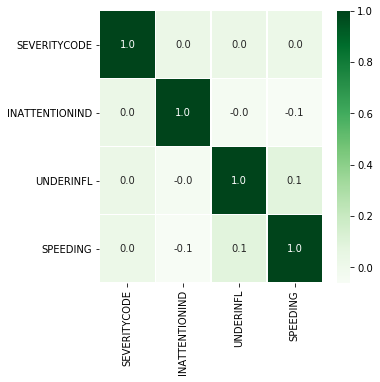

In [17]:
# Select the variables
df_HM1 = df[['SEVERITYCODE', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING']]

# Create the Correlation Matrix
sns.set_palette('deep')
plt.figure(figsize = (5,5))
sns.heatmap(df_HM1.corr(), annot = True, linewidths = .5, fmt = '.01f', cmap = 'Greens')

According to this heatmap, we see that whether the driver is under the influence and their inattentiveness are not correlated to the severity of a collision. There is just a very slightly correlation of a driver speeding and being under the influence.

#### Person / Pedestrian / Bicycle / Vehicle:

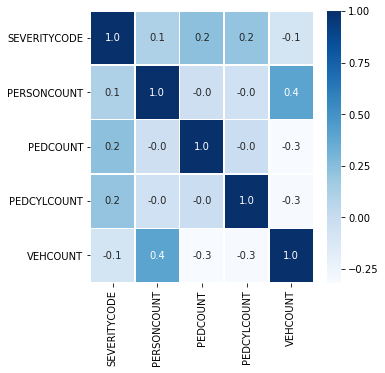

In [18]:
# Select the variables
df_HM2 = df[['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]

# Create the Correlation Matrix
sns.set_palette('deep')
plt.figure(figsize = (5,5))
sns.heatmap(df_HM2.corr(), annot = True, linewidths = .5, fmt = '.01f', cmap = 'Blues')

This heatmap tells us that the severity of a collision is higher when pedestrians and/or bicycles are involved. We also see the correlation between the number of vehicles and persons involved in an accident.

#### Type of Location:

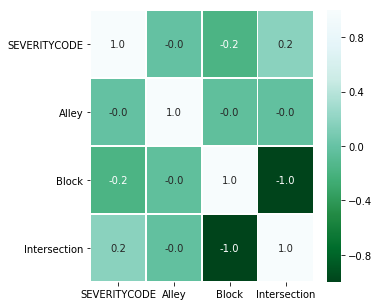

In [19]:
# Select the variables
df_HM3 = df[['SEVERITYCODE', 'Alley', 'Block', 'Intersection']]

# Create the Correlation Matrix
sns.set_palette('deep')
plt.figure(figsize = (5,5))
sns.heatmap(df_HM3.corr(), annot = True, linewidths = .5, fmt = '.01f', cmap = 'BuGn_r')

The heatmap by type of location shows us the slight correlation that exists between severity and intersection. A collision is more likely to be more severe when it takes place in an intersection, instead of an alley or a block.

#### Weather Conditions:

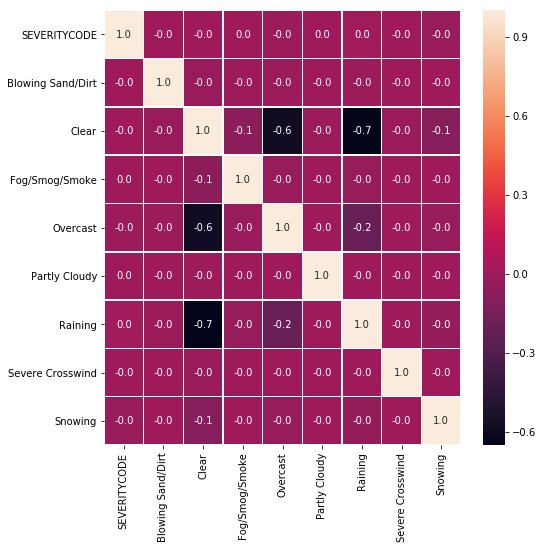

In [20]:
# Select the variables
df_HM4 = df[['SEVERITYCODE', 'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind', 'Snowing']]

# Create the Correlation Matrix
plt.figure(figsize = (8,8))
sns.heatmap(df_HM4.corr(), annot = True, linewidths = .5, fmt = '.01f')

According to this heatmap, there is no correlation between Weather Conditions and the Severity of a collision.

#### Light Conditions:

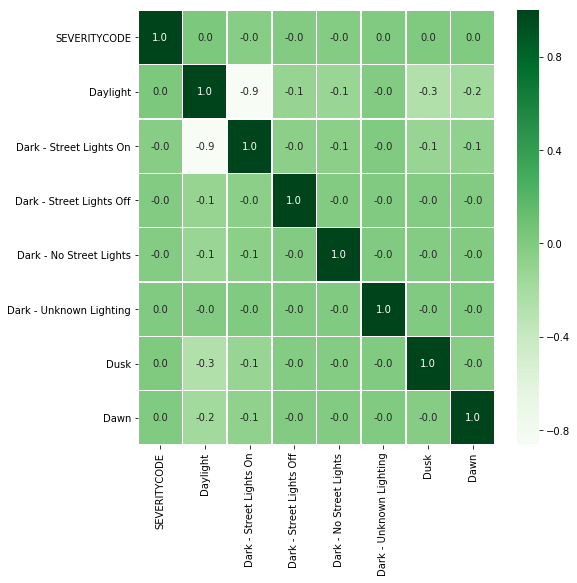

In [21]:
# Select the variables
df_HM5 = df[['SEVERITYCODE', 'Daylight', 'Dark - Street Lights On', 'Dark - Street Lights Off', 'Dark - No Street Lights', 'Dark - Unknown Lighting', 'Dusk', 'Dawn']]

# Create the Correlation Matrix
sns.set_palette('deep')
plt.figure(figsize = (8,8))
sns.heatmap(df_HM5.corr(), annot = True, linewidths = .5, fmt = '.01f', cmap = 'Greens')

As it happens with Weather Conditions, there is no correlation between Light Conditions (daylight, dark...) and the Severity of a collision.

#### Road Conditions:

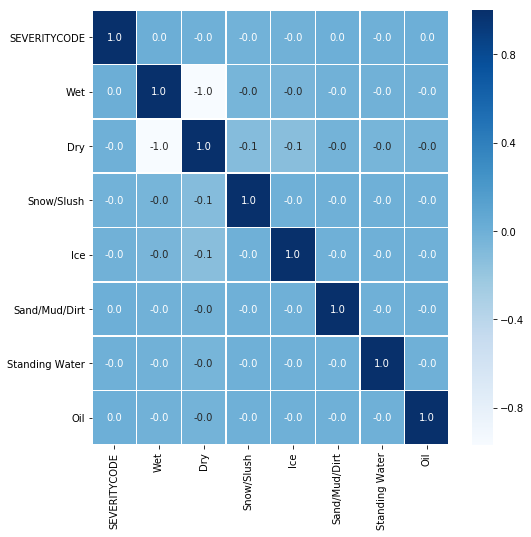

In [22]:
# Select the variables
df_HM6 = df[['SEVERITYCODE', 'Wet', 'Dry', 'Snow/Slush', 'Ice', 'Sand/Mud/Dirt', 'Standing Water', 'Oil']]

# Create the Correlation Matrix
sns.set_palette('deep')
plt.figure(figsize = (8,8))
sns.heatmap(df_HM6.corr(), annot = True, linewidths = .5, fmt = '.01f', cmap = 'Blues')

Finally, this last heatmap shows us that there is no correlation neither between Road Conditions and the Severity of a collision.

## PREDICTIVE MODELING <a name="predictive_modeling"></a>

### Normalize Data:

Lets first load some of the required libraries:

In [23]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_similarity_score, f1_score, precision_score, recall_score

Data Standardization give data zero mean and unit variance. Now we are going to normalize the data and display the normalized set:

In [24]:
# Normalize
FeatureSet = df.drop(['SEVERITYCODE'],axis=1)
FeatureSet = preprocessing.StandardScaler().fit(FeatureSet).transform(FeatureSet)

# Display the normalized set
X = FeatureSet;
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


array([[-0.36272672, -0.19699288, -0.17915112,  0.04798502, -0.45079624,
        -0.23676723, -0.23797531, -0.49054909, -0.03290762, -1.31403371,
         1.31709943,  1.99243401, -0.17893329, -0.10825023, -0.29409492,
        -0.38858566, -0.49029092, -0.19709751, -0.48954999, -0.13048019,
        -0.34091549, -0.10404695,  1.34853486, -0.25147385, -0.38043491,
        -0.90023548, -0.03025287, -0.00546655, -0.01584533, -1.33358031,
        -0.05690114,  2.3054346 , -0.00546655, -0.48813308, -0.01222432,
        -0.02517751, -0.06978911, -1.58200911, -0.07995999, -0.01846008,
        -0.01893981, -0.07030607, -0.02457616,  1.63221966, -0.09022155,
        -0.08078853, -0.6159203 , -0.00691477, -0.11991675,  0.7129595 ,
        -0.18530866],
       [-0.36272672, -0.19699288, -0.17915112,  0.04798502, -0.45079624,
        -0.23676723, -0.23797531, -0.49054909, -0.03290762,  0.76101548,
        -0.75924412, -0.50189868, -0.17893329, -0.10825023, -0.29409492,
        -0.38858566, -0.49029

Now lets define the Target Value variable 'SEVERITYCODE', and display it:

In [25]:
# Target Value variable: SEVERITYCODE
FeatureTarget = df['SEVERITYCODE'].values

# Display
y = FeatureTarget;
y[0:5]

array([2, 1, 1, 1, 2])

### Split Dataset into Training and Test sets:

First we create the Training and Test Set, and display both of them:

In [26]:
# Create
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=10)

# Training Set
print ('Train set:', X_train.shape,  y_train.shape)

# Test Set
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (133858, 51) (133858,)
Test set: (33465, 51) (33465,)


### Machine Learning Models:

Now we use the Training Set to build an accurate model. Then we are going to use the Test Set to report the accuracy of the model.

For this project we used the following:
   - *Decision Tree*
   - *Logistic Regression*
   - *XGBoost*
   - *Random Forest Classifier*

#### Decision Tree:

In [27]:
from sklearn.tree import DecisionTreeClassifier
SeverityTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
SeverityTree.fit(X_train,y_train)
SeverityTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Logistic Regression:

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
SeverityLR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
SeverityLR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

#### XGBoost:

In [29]:
from xgboost import XGBClassifier
SeverityGBB = XGBClassifier()
SeverityGBB.fit(X_train, y_train)
SeverityGBB

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

#### Random Forest Classifier:

In [30]:
from sklearn.ensemble import RandomForestClassifier
SeverityRFC = RandomForestClassifier(n_estimators=100, criterion="entropy")
SeverityRFC.fit(X_train, y_train)
SeverityRFC

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Evaluation:

Lets evaluate the model:

#### Decision Tree:

In [35]:
from sklearn.metrics import accuracy_score

# Decision Tree
yhat_dt = SeverityTree.predict(X_test)

# Decision Tree-jaccard
jaccard_dt = jaccard_similarity_score(y_test, yhat_dt)
print("Decision Tree-Jaccard index: ", jaccard_dt)

# Decision Tree-f1_score
f1_score_dt = f1_score(y_test, yhat_dt, average='weighted')
print("Decision Tree-F1-score: ", f1_score_dt)

# Decision Tree-precision_score
ps_dTree = precision_score(y_test, yhat_dt)
print("Decision Tree-Precision score: ", ps_dTree)

Decision Tree-Jaccard index:  0.7198565665620797
Decision Tree-F1-score:  0.6521647267460448
Decision Tree-Precision score:  0.7067417538213998


#### Logistic Regression:

In [36]:
from sklearn.metrics import log_loss

# Logistic Regression
yhat_lg = SeverityLR.predict(X_test)
yhat_lg_prob = SeverityLR.predict_proba(X_test)

# Logistic Regression-jaccard
jaccard_lg = jaccard_similarity_score(y_test, yhat_lg)
print("Logistic Regression-Jaccard index: ", jaccard_lg)

# Logistic Regression-f1_score
f1_score_lg = f1_score(y_test, yhat_lg, average='weighted')
print("Logistic Regression-F1-score: ", f1_score_lg)

# Logistic Regression-precision_score
ps_lr = precision_score(y_test, yhat_lg)
print("Logistic Regression-Precision score: ", ps_lr)

# Logistic Regression-logloss
logloss_lg = log_loss(y_test, yhat_lg_prob)
print("Logistic Regression-Log Loss: ", logloss_lg)

Logistic Regression-Jaccard index:  0.7284625728372927
Logistic Regression-F1-score:  0.6881794756112793
Logistic Regression-Precision score:  0.726758035005351
Logistic Regression-Log Loss:  0.5264262331108529


#### XGBoost:

In [37]:
# XGBoost
yhat_xgb = SeverityGBB.predict(X_test)

# XGBoost-jaccard
jaccard_xgb = jaccard_similarity_score(y_test, yhat_xgb)
print("XGBoost-Jaccard index: ", jaccard_xgb)

# XGBoost-f1_score
f1_score_xgb = f1_score(y_test, yhat_xgb, average='weighted')
print("XGBoost-F1-score: ", f1_score_xgb)

# XGBoost-precision_score
ps_xgb = precision_score(y_test, yhat_xgb)
print("XGBoost-Precision score: ", ps_xgb)

XGBoost-Jaccard index:  0.7304347826086957
XGBoost-F1-score:  0.6909986938270127
XGBoost-Precision score:  0.7283386946145066


#### Random Forest Classifier:

In [38]:
# Random Forest Classifier
yhat_rfc = SeverityRFC.predict(X_test)

# Random Forest Classifier-jaccard
jaccard_rfc = jaccard_similarity_score(y_test, yhat_rfc)
print("Random Forest Classifier-Jaccard index: ", jaccard_rfc)

# Random Forest Classifier-f1_score
f1_score_rfc = f1_score(y_test, yhat_rfc, average='weighted')
print("Random Forest Classifier-F1-score: ", f1_score_rfc)

# Random Forest Classifier-precision_score
ps_rfc = precision_score(y_test, yhat_rfc)
print("Random Forest Classifier-Precision score: ", ps_rfc)

Random Forest Classifier-Jaccard index:  0.7103839832660989
Random Forest Classifier-F1-score:  0.6902318528486457
Random Forest Classifier-Precision score:  0.7379252733900364


## RESULTS AND DISCUSSION <a name="results_and_discussion"></a>

Here we see the accuracy of the built model with the different evaluation metrics previously used:

| Algorithm                 |     Jaccard    |     F1-score    |    Precision    |    LogLoss    |
|---------------------------|----------------|-----------------|-----------------|---------------|
| Decision Tree             | 0.7199         | 0.6522          | 0.7067          | NA            |
| Logistic Regression       | 0.7285         | 0.6882          | 0.7268          | 0.5264        |
| XGBoost                   | 0.7304         | 0.6910          | 0.7283          | NA            |
| Random Forest Classifier  | 0.7104         | 0.6902          | 0.7379          | NA            |

We have used 4 different algorithms:

   - **Decision Tree** (accuracy of 71.99%). Are built by splitting the training set into distinct nodes, where one node contains all of or most of
   one category of the data.
   - **Logistic Regression** (accuracy of 72.85%). It fits a special s-shaped curve by taking the linear regression and transforming the numeric
   estimate into a probability with the sigmoid function.
   - **XGBoost** (accuracy of 73.04%). Is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable.
   XGBoost provides a parallel tree boosting that solve many data science problems in a fast and accurate way.
   - **Random Forest Classifier** (accuracy of 71.04%). It fits a number of decision tree classifiers on various sub-samples of the dataset and uses
   averaging to improve the predictive accuracy and control over-fitting.
   
And also 4 different model evaluation metrics:

   - **Jaccard Index**
   - **F1-score**
   - **Precision**
   - **LogLoss**

The Jaccard Index is one of the simplest accuracy measurements. According to this model, the XGBoost has a 73.04% match between the training set and the test set, being the algorithm with the best accuracy. This means that, using this algorithm; we could predict correctly the severity of almost 3 out of 4 collisions in Seattle.

Following the F1-score, XGBoost also has the highest harmonic average of the precision and recall. But it is the Random Forest Classifier the one with a better precision, only 1% far from the XGBoost and Logistic Regression.

On the other hand, the Logistic Regression has a Logarithmic Loss (or a performance) of 52.6%.

With the analysis made in this project, we can say that drivers should be a bit more careful when driving from Monday to Friday, during daylight, with clear and dry weather and road conditions, when there are pedestrians or bicycles around, and when driving in an intersection (a collision is more likely to be more severe if it takes place there). And, of course, not to speed or drive under the influence.


## CONCLUSION <a name="conclusion"></a>

The main goal of this Capstone Project was to focus on the analysis of the shared dataset for Seattle city, in order to create a machine-learning model able to predict accident "severity". So drivers can be warned and have more information about the possibility of getting into a car accident and how severe it would be.

According to the results, we are able to predict the severity of almost 3 out of 4 collisions. Taking into account road, weather and light conditions; location; speeding, inattentiveness and if the driver is under the influence; number of pedestrians, bicycles and vehicles involved.

This means that the number of sever accidents could be reduced if drivers have and use this information when traveling. So they can be more careful when driving, and changing their route if possible, in order to arrive safe and on time.